In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install patchify

In [7]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [8]:
minmaxscaler = MinMaxScaler()

In [9]:
!ls -lah '/content/drive/MyDrive'

total 769M
-rw-------  1 root root 3.2M Feb  3  2021 '24kGoldn - Mood (Lyrics) ft. Iann Dior.mp3'
-rw-------  1 root root 5.1M Feb  3  2021 'Alan Walker - Different World feat. Sofia Carson, K-391 & CORSAK (Lyric Video).mp3'
-rw-------  1 root root 3.9M Feb  3  2021 'Alec Benjamin - Let Me Down Slowly (Lyrics).mp3'
-rw-------  1 root root 5.3M Feb  3  2021 'Alessia Cara - Scars To Your Beautiful (Lyrics).mp3'
-rw-------  1 root root    9 Feb  3  2021 'Amma Ji-2012141126.amr'
-rw-------  1 root root 4.8M Feb  3  2021 'Arash- I m so lonely broken angle lyrics.mp3'
-rw-------  1 root root 4.0M Feb  3  2021 'Ariana Grande - positions (Lyrics).mp3'
-rw-------  1 root root 5.0M Feb  3  2021 'Awari Full Video SongEk VillainSidharth MalhotraShraddha Kapoor.mp3'
-rw-------  1 root root 4.6M Feb  3  2021 'Billie Eilish - lovely (Lyrics) ft. Khalid.mp3'
drwx------  2 root root 4.0K Feb 24 08:56 'Colab Notebooks'
-rw-------  1 root root 1.5M Sep 16  2018 'Getting started.pdf'
-rw-------  1 root ro

In [10]:
dataset_root_folder = '/content/drive/MyDrive/'

In [11]:
dataset_name = "satellite"

In [12]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks': # 'images
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')): # '.jpg
        #print(image_name)
        a = True

/content/drive/MyDrive/satellite/Tile 6/masks
/content/drive/MyDrive/satellite/Tile 8/masks
/content/drive/MyDrive/satellite/Tile 2/masks
/content/drive/MyDrive/satellite/Tile 5/masks
/content/drive/MyDrive/satellite/Tile 1/masks
/content/drive/MyDrive/satellite/Tile 3/masks
/content/drive/MyDrive/satellite/Tile 7/masks
/content/drive/MyDrive/satellite/Tile 4/masks


In [13]:
image_patch_size = 256

In [14]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [15]:
image.shape

(544, 509, 3)

In [16]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size
                         )

In [17]:
len(image_patches)

2

In [18]:
print(image_patches.shape)

(2, 1, 1, 256, 256, 3)


In [19]:
minmaxscaler = MinMaxScaler()

In [20]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [21]:
image_y[0].shape

(256, 256, 3)

In [22]:
print(type(image))

<class 'numpy.ndarray'>


In [23]:
type(Image.fromarray(image))

PIL.Image.Image

In [24]:
image.shape

(544, 509, 3)

In [25]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [26]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [27]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [28]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [29]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [30]:
type(image_dataset[0])

numpy.ndarray

In [31]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

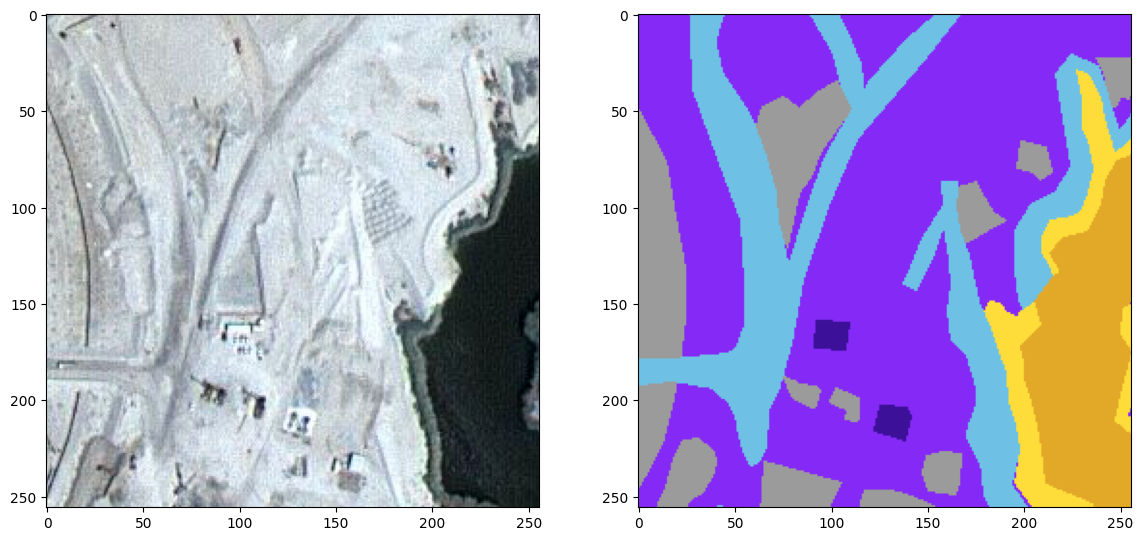

In [32]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [33]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [34]:
mask_dataset.shape[0]

945

In [35]:
label = individual_patched_mask

In [36]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [37]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [38]:
print(len(labels))

945


In [39]:
labels = np.array(labels)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
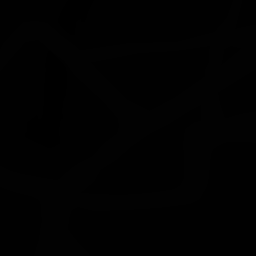

In [40]:
labels[3]

In [41]:
labels = np.expand_dims(labels, axis=3)

In [42]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [43]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [44]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


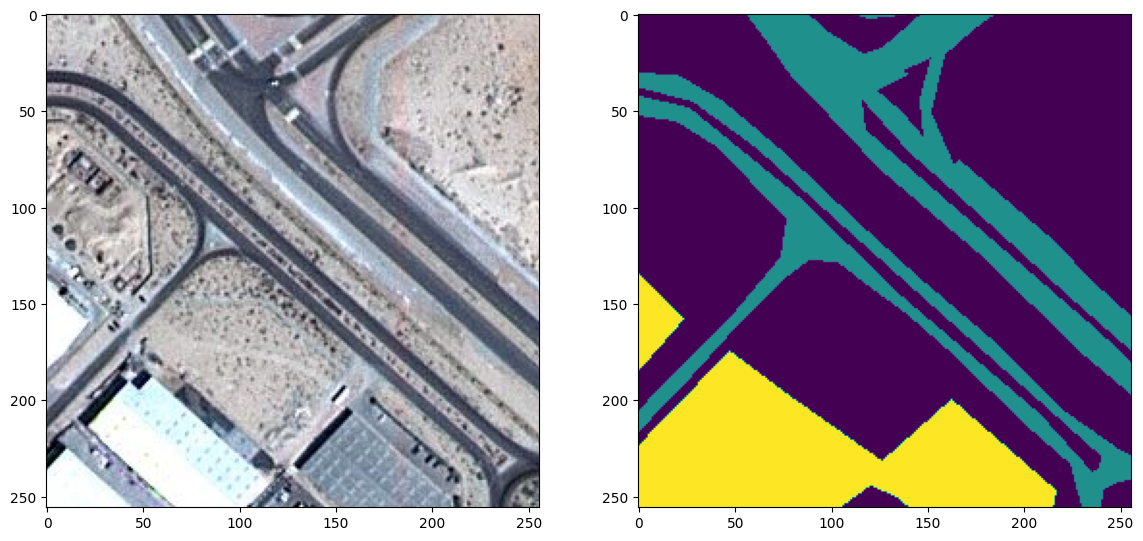

In [45]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
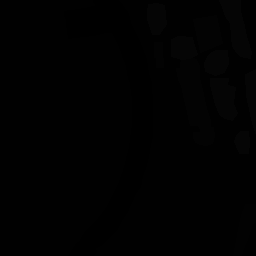

In [46]:
labels[0][:,:,0]

In [47]:
total_classes = len(np.unique(labels))

In [48]:
total_classes

6

In [49]:
from tensorflow.keras.utils import to_categorical

In [50]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [51]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [52]:
master_trianing_dataset = image_dataset

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [56]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [57]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [58]:
!pip install -U segmentation_models
!pip install -q keras==2.15.0
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [59]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [60]:
from keras import backend as K

In [61]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [62]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [63]:
metrics = ["accuracy", jaccard_coef]

In [64]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [65]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [66]:
model = get_deep_learning_model()

In [67]:
model.get_config()

{'name': 'model',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': N

In [68]:
weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]

In [69]:
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [70]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [71]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [72]:
total_loss = dice_loss + (1 * focal_loss)

In [73]:
import tensorflow as tf


In [74]:
tf.keras.backend.clear_session()

In [75]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [76]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [77]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=10,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/10
51/51 [==============================] - 41s 380ms/step - loss: 0.9981 - accuracy: 0.5912 - jaccard_coef: 0.2695 - val_loss: 0.9865 - val_accuracy: 0.6599 - val_jaccard_coef: 0.2916
Epoch 2/10
51/51 [==============================] - 11s 209ms/step - loss: 0.9758 - accuracy: 0.6794 - jaccard_coef: 0.3634 - val_loss: 0.9730 - val_accuracy: 0.6612 - val_jaccard_coef: 0.3686
Epoch 3/10
51/51 [==============================] - 11s 206ms/step - loss: 0.9703 - accuracy: 0.6918 - jaccard_coef: 0.3944 - val_loss: 0.9696 - val_accuracy: 0.6671 - val_jaccard_coef: 0.4112
Epoch 4/10
51/51 [==============================] - 11s 207ms/step - loss: 0.9658 - accuracy: 0.7016 - jaccard_coef: 0.4172 - val_loss: 0.9617 - val_accuracy: 0.6896 - val_jaccard_coef: 0.4544
Epoch 5/10
51/51 [==============================] - 11s 209ms/step - loss: 0.9586 - accuracy: 0.7163 - jaccard_coef: 0.4578 - val_loss: 0.9628 - val_accuracy: 0.7090 - val_jaccard_coef: 0.4768
Epoch 6/10
51/51 [=================

In [78]:
history_a = model_history

In [79]:
history_a.history

{'loss': [0.998105525970459,
  0.9758198261260986,
  0.9702978730201721,
  0.965840756893158,
  0.9585762023925781,
  0.9519407153129578,
  0.9470377564430237,
  0.9432672262191772,
  0.9378305673599243,
  0.9346017837524414],
 'accuracy': [0.5911569595336914,
  0.6794355511665344,
  0.6917733550071716,
  0.7015510201454163,
  0.7162827253341675,
  0.7370926141738892,
  0.7538437843322754,
  0.7669382691383362,
  0.7828798294067383,
  0.7928020358085632],
 'jaccard_coef': [0.26954659819602966,
  0.36337143182754517,
  0.3943709135055542,
  0.41724511981010437,
  0.4578395485877991,
  0.4962162673473358,
  0.5230738520622253,
  0.5434525609016418,
  0.5727117657661438,
  0.5887481570243835],
 'val_loss': [0.9865097403526306,
  0.9730221629142761,
  0.969637393951416,
  0.9616572260856628,
  0.9628300070762634,
  0.9575239419937134,
  0.9516987204551697,
  0.9515812993049622,
  0.9437693357467651,
  0.94318687915802],
 'val_accuracy': [0.6598612666130066,
  0.6612475514411926,
  0.667073

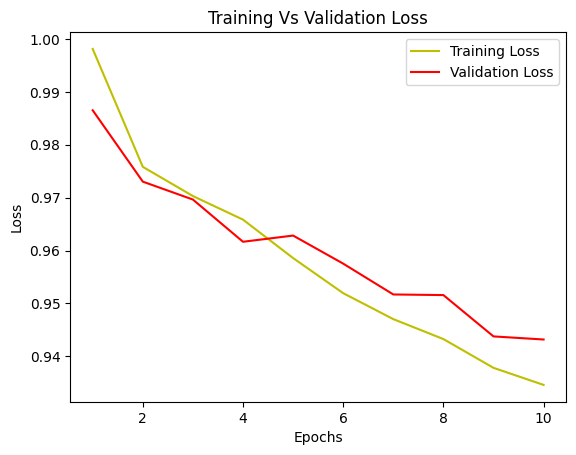

In [80]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

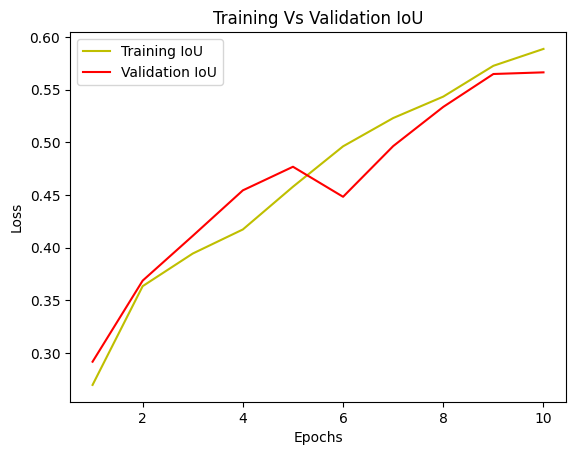

In [81]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [82]:
model_history.params

{'verbose': 1, 'epochs': 10, 'steps': 51}

In [83]:
y_pred = model.predict(X_test)

5/5 [==============================] - 5s 51ms/step


In [84]:
len(y_pred)

142

In [85]:
y_pred

array([[[[7.42467642e-02, 3.31551254e-01, 1.94596827e-01,
          2.03063801e-01, 1.07585937e-01, 8.89553949e-02],
         [5.11128642e-02, 3.78682196e-01, 2.64244020e-01,
          1.09057970e-01, 9.69127640e-02, 9.99901667e-02],
         [5.76376431e-02, 3.47180426e-01, 3.00009966e-01,
          9.03778523e-02, 1.25728086e-01, 7.90659785e-02],
         ...,
         [4.74157371e-02, 2.26612285e-01, 4.03180420e-01,
          3.77919115e-02, 2.69401699e-01, 1.55979469e-02],
         [6.53854162e-02, 2.20198959e-01, 3.81218821e-01,
          4.17183824e-02, 2.71656334e-01, 1.98220666e-02],
         [8.46875012e-02, 1.69388011e-01, 3.59040618e-01,
          7.55149871e-02, 2.56576449e-01, 5.47923930e-02]],

        [[2.68745143e-02, 4.58523870e-01, 2.24532679e-01,
          1.71040744e-01, 6.62222579e-02, 5.28058521e-02],
         [1.49207255e-02, 5.68283260e-01, 2.14325219e-01,
          9.79846194e-02, 3.50073911e-02, 6.94787502e-02],
         [2.40175892e-02, 4.62611318e-01, 3.0790

In [86]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [87]:
len(y_pred_argmax)

142

In [88]:
y_pred_argmax

array([[[1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        [1, 1, 1, ..., 2, 2, 2],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        [0, 0, 0, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0],
        [4, 4, 4, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        ...,
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4],
        [4, 4, 4, ..., 4, 4, 4]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4],
        [1, 1, 1, ..., 4, 4, 4]],

       [[0, 0, 0, ..., 0, 4, 4],
        [0, 0, 0, ..., 0, 0, 4],
        [0, 0, 0, ..., 0, 0, 4],
        ...,
        [0, 0, 0, ..., 

In [89]:
y_test_argmax = np.argmax(y_test, axis=3)

In [90]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [91]:
import random

In [92]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 1s 981ms/step


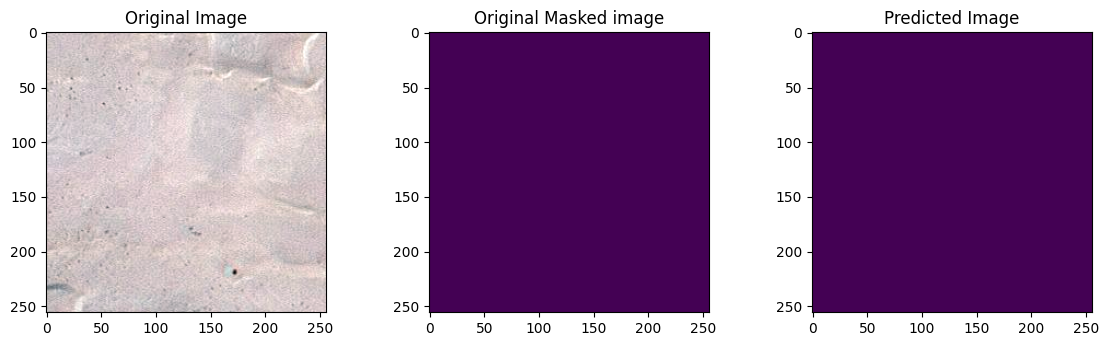

In [94]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [95]:
model.save("satellite_segmentation_full.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [96]:
!ls -lah

total 23M
drwxr-xr-x 1 root root 4.0K Apr  3 10:29 .
drwxr-xr-x 1 root root 4.0K Apr  3 09:50 ..
drwxr-xr-x 4 root root 4.0K Apr  1 13:23 .config
drwx------ 5 root root 4.0K Apr  3 09:51 drive
drwxr-xr-x 1 root root 4.0K Apr  1 13:24 sample_data
-rw-r--r-- 1 root root  23M Apr  3 10:29 satellite_segmentation_full.h5
